<a href="https://colab.research.google.com/github/jjackson1994/Information_Theory/blob/main/Extinction_Mariam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Extinction
We wanted to see how the network changes if we remove some of the plants or some of the pollinators.

In [ ]:
#working from Google colab
!pip install infomap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.1/263.1 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for infomap: filename=infomap-2.7.1-cp310-cp310-linux_x86_64.whl size=7690305 sha256=cb068d0af156704d76361ef8fe611bacd5f64b52d43ae2f6cdc79aaea43b78ad
  Stored in directory: /root/.cache/pip/wheels/e4/01/53/fd7c62079098140cd582b999592b4592c0dad7300cac32b6e1
Successfully built infomap


In [ ]:
from infomap import Infomap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
np.random.seed(0)

In [ ]:
#!infomap --help

In [ ]:
def runinfomap(trials,filename):

  im = Infomap()
  im.read_file(filename, accumulate=False)
  im.run(num_trials=trials)
  codelength = im.codelengths
  levels = im.max_depth
  modules = im.num_leaf_modules
  return codelength, levels, modules

In [ ]:
#reading the files, change directory if needed
trials = 5
filenames = []
codelengths = []
levels = []
modules = []
for i in range(0,16):
  filenames.append('freq_thr_'+str(i))

for f in filenames:
  codelength, level, module = runinfomap(trials,f)
  codelengths.append(codelength)
  levels.append(level)
  modules.append(module)


## Killing some plants and pollinators


In [ ]:
def cut_poll(filename,ID):
  df = pd.read_csv(filename,delimiter=' ', names = ['poll_ID', 'plant_ID', 'freq'])
  df_subset = df.loc[df['poll_ID'] == ID]
  df_new = df.merge(df_subset, how='left', indicator=True)
  df_new = df_new[df_new['_merge'] == 'left_only']
  df_new = df_new.drop(columns = ['_merge'])
  df = df_new
  df.to_csv('rm_pol'+str(ID)+'_'+str(filename),sep = ' ',index=False, header = False)
  return str('rm_pol'+str(ID)+'_'+str(filename))


In [ ]:
def cut_plant(filename,ID):
  df = pd.read_csv(filename,delimiter=' ', names = ['poll_ID', 'plant_ID', 'freq'])
  df_subset = df.loc[df['poll_ID'] == ID]
  df_new = df.merge(df_subset, how='left', indicator=True)
  df_new = df_new[df_new['_merge'] == 'left_only']
  df_new = df_new.drop(columns = ['_merge'])
  df = df_new
  df.to_csv('rm_plant'+str(ID)+'_'+str(filename),sep = ' ',index=False,header = False)
  return str('rm_plant'+str(ID)+'_'+str(filename))

With different frequency thresholds we remove either a plant or a pollinator. We do this three times: removing randomly, with the highest frequency and the lowest frequency.

In [ ]:
#take one random, one most frequent, one least frequent plant and pollinator to kill
df = pd.read_csv('freq_thr_15',delimiter=' ', names= ['poll_ID', 'plant_ID','freq'])
pol_IDS = df['poll_ID'].unique()
plant_IDS = df['plant_ID'].unique()
pol_rand_ID = np.random.choice(pol_IDS)
plant_rand_ID = np.random.choice(plant_IDS)
poll_max = df['poll_ID'].value_counts().idxmax()
poll_min = df['poll_ID'].value_counts().idxmin()
plant_max = df['plant_ID'].value_counts().idxmax()
plant_min = df['plant_ID'].value_counts().idxmin()
pols = [pol_rand_ID,poll_max,poll_min]
plants = [plant_rand_ID,plant_max, plant_min]


In [ ]:
#create data files after killing
new_fnames_pols = [] #store the new filenames here
new_fnames_plants = []
for pol_ID in pols:
  new_fnames_pols.append(cut_poll("freq_thr_15",pol_ID))
for plant_ID in plants:
  new_fnames_plants.append(cut_plant("freq_thr_15",plant_ID))


In [ ]:
codelengths_1 = [] #1 = killed pollinators, 2 = killed plants
codelengths_2 = []
levels_1 = []
levels_2 = []
modules_1 = []
modules_2 = []

for f_1 in new_fnames_pols:
  codelength, level, module = runinfomap(trials,f_1)
  codelengths_1.append(codelength)
  levels_1.append(level)
  modules_1.append(module)
for f_2 in new_fnames_plants:
  codelength, level, module = runinfomap(trials,f_2)
  codelengths_2.append(codelength)
  levels_2.append(level)
  modules_2.append(module)


In [ ]:
#freq_thr_1

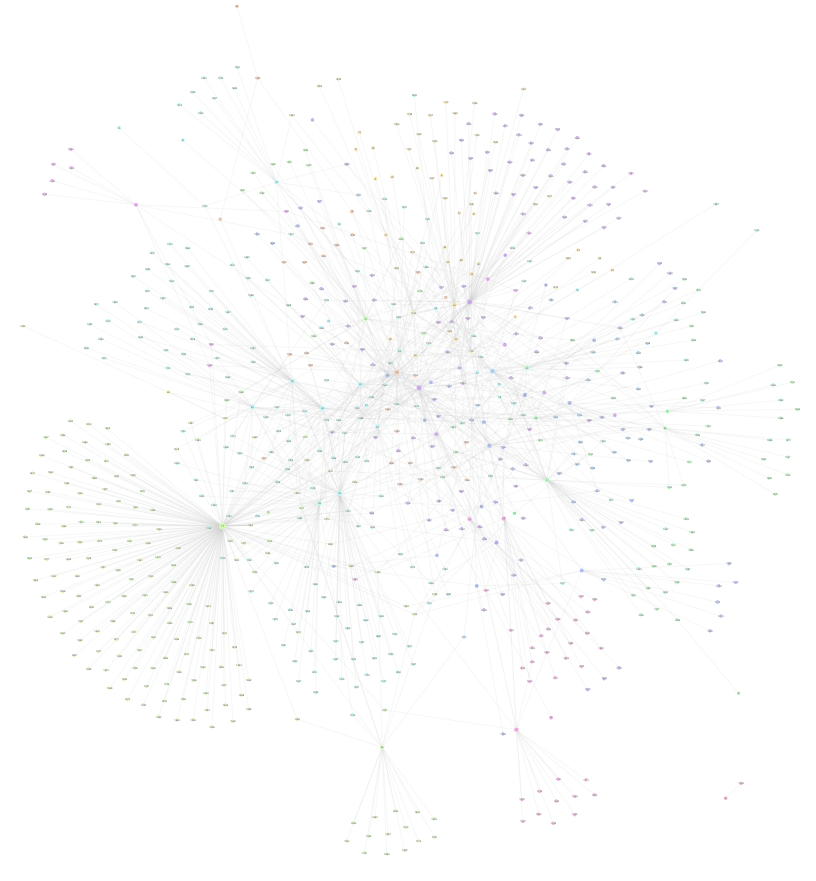

In [ ]:
#rm_plant2_num_freq_thr_1

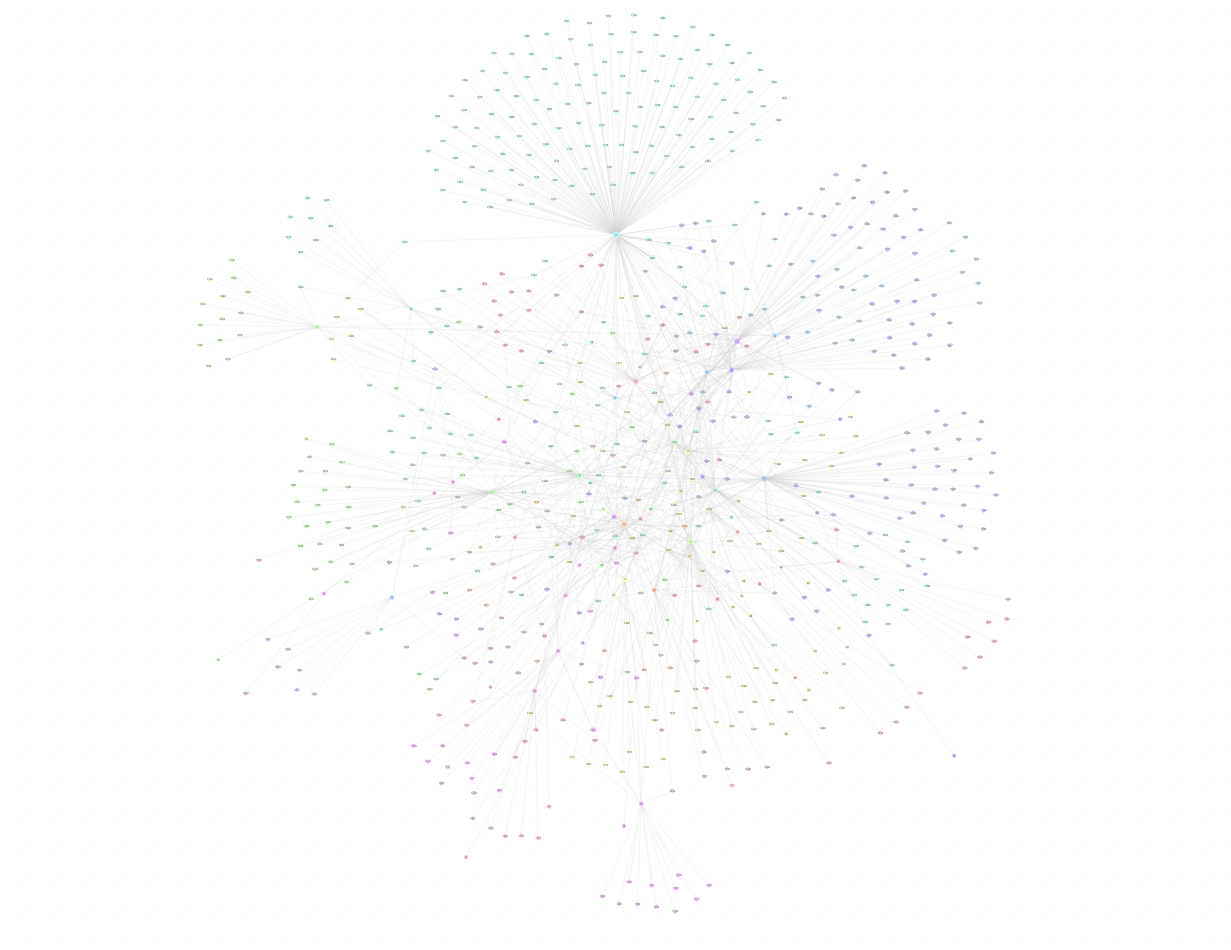

In [ ]:
#rm_pol1083_num_freq_thr_1

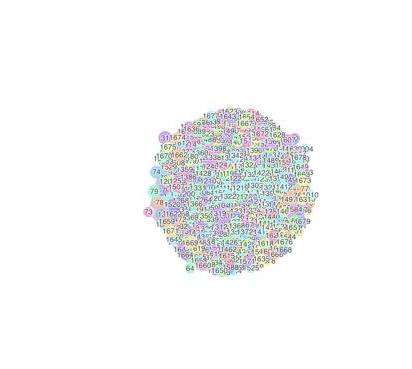

In [ ]:
#rm_pol1671_freq_thr_15

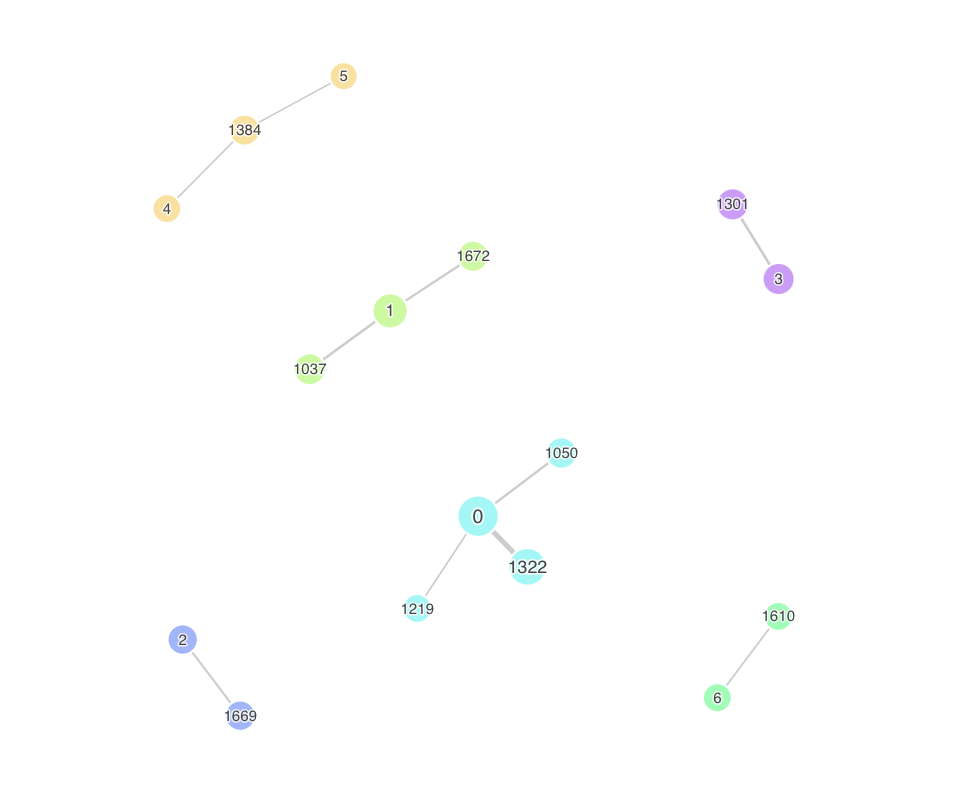

In [ ]:
#rm_plant15_freq_thr_5

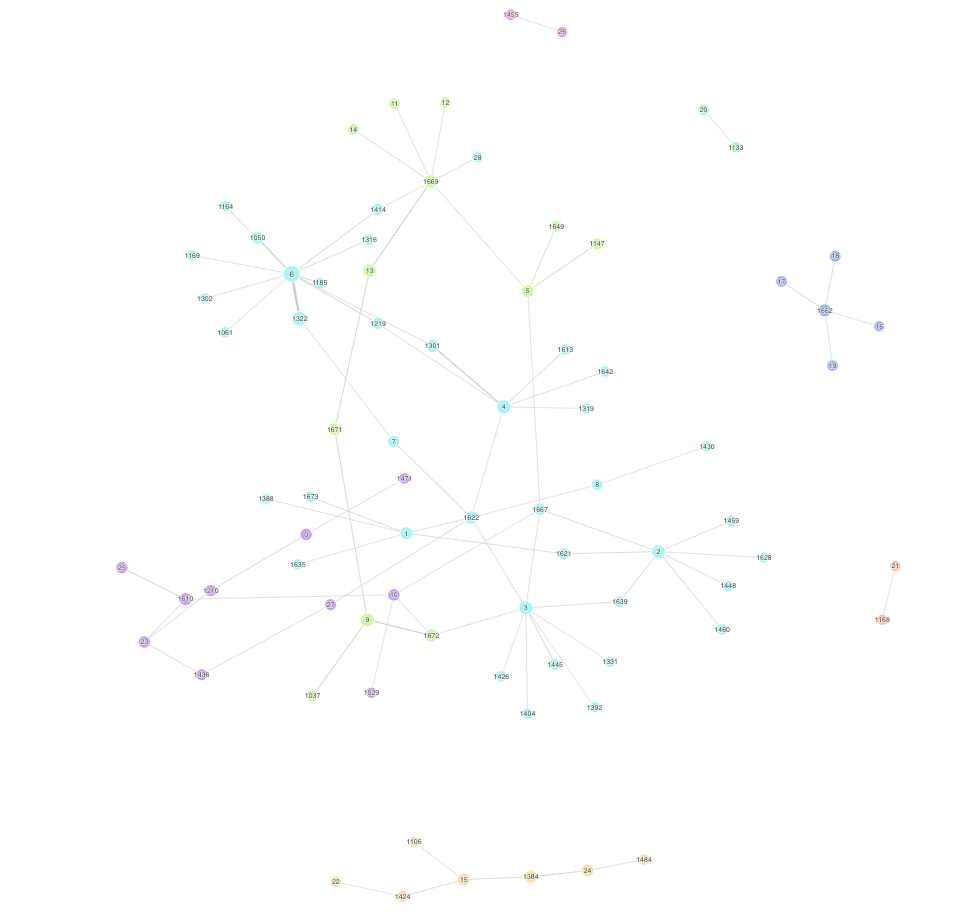

In [ ]:
#rm_pol1147_freq_thr_5

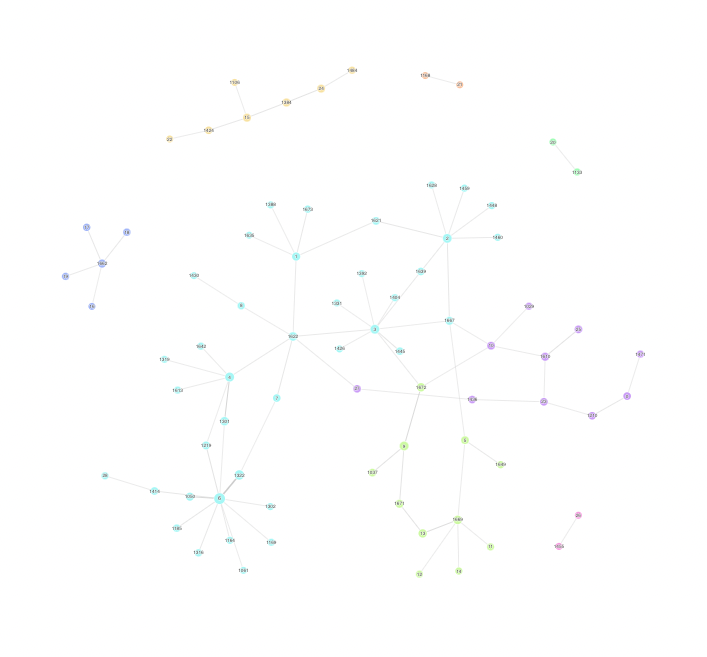